In [14]:
from cliff_game import CliffGame, Action
from algorithms import Sarsa, QLearning
from plotting import plot_rewards

In [15]:
cg = CliffGame()
print(cg)

reward = 0



|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|  S* |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  G  |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|



In [16]:
r, game_over = cg.move(Action.UP)
reward += r
print(reward, game_over)
print(cg)

-1 False

|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|   * |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|  S  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  G  |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|



In [17]:
seq = [Action.RIGHT, Action.RIGHT, Action.DOWN, Action.RIGHT]

for i, action in enumerate(seq):
    print(f"{i+1}/{len(seq)} Moving {action.name}")
    r, game_over = cg.move(action)
    reward += r
    if game_over:
        print("Game Over")
        break

print("\nTotal reward:", reward)
print(cg)

1/4 Moving RIGHT
2/4 Moving RIGHT
3/4 Moving DOWN
Game Over

Total reward: -103

|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|  S  |  C  |  C* |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  C  |  G  |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|



In [18]:
N_EPISODES = 100
sarsa = Sarsa(cg)
sarsa_rewards = sarsa.run(N_EPISODES)    # print(" ", r)

In [19]:
ql = QLearning(cg)
ql_rewards = ql.run(N_EPISODES)

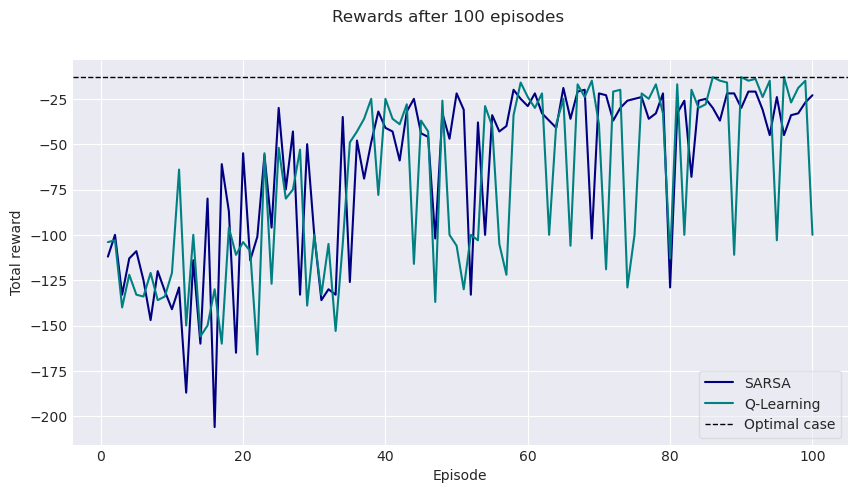

In [20]:
%matplotlib inline

SARSA_COLOUR = 'navy'
QL_COLOUR = 'teal'

plot_rewards(
    {'SARSA': sarsa_rewards, 'Q-Learning': ql_rewards},
    {'SARSA': SARSA_COLOUR, 'Q-Learning': QL_COLOUR},
    title=f"Rewards after {N_EPISODES} episodes",
    optimal=-13
)

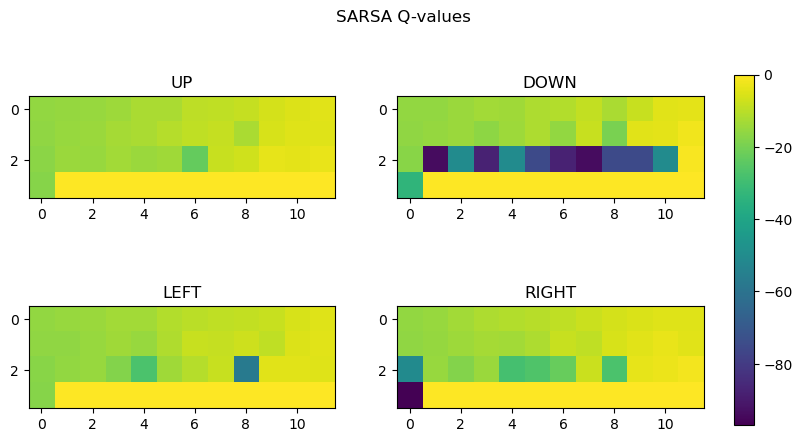

In [21]:
sarsa.plot_q_values()

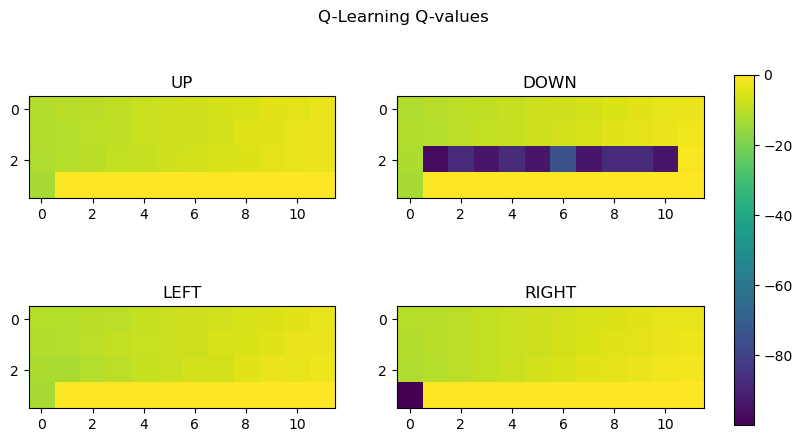

In [22]:
ql.plot_q_values()

In [23]:
_, sarsa_policy_actions, _ = sarsa.get_current_policy()
sarsa_policy_actions

array([[<Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.DOWN: 2>, <Action.DOWN: 2>],
       [<Action.LEFT: 3>, <Action.UP: 1>, <Action.RIGHT: 4>,
        <Action.UP: 1>, <Action.UP: 1>, <Action.UP: 1>, <Action.LEFT: 3>,
        <Action.DOWN: 2>, <Action.RIGHT: 4>, <Action.DOWN: 2>,
        <Action.RIGHT: 4>, <Action.DOWN: 2>],
       [<Action.UP: 1>, <Action.UP: 1>, <Action.UP: 1>, <Action.UP: 1>,
        <Action.UP: 1>, <Action.UP: 1>, <Action.LEFT: 3>,
        <Action.RIGHT: 4>, <Action.UP: 1>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.DOWN: 2>],
       [<Action.UP: 1>, '', '', '', '', '', '', '', '', '', '', '']],
      dtype=object)

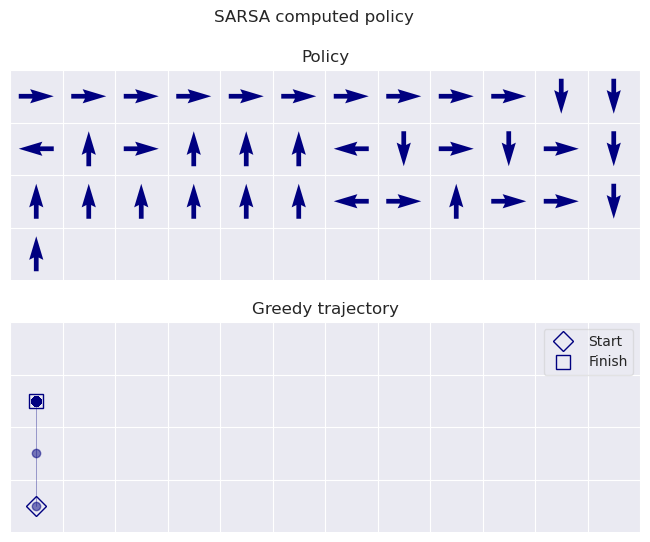

In [24]:
sarsa.plot_current_policy(color=SARSA_COLOUR)

In [25]:
_, ql_policy_actions, _ = ql.get_current_policy()
ql_policy_actions

array([[<Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.DOWN: 2>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.DOWN: 2>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.DOWN: 2>, <Action.DOWN: 2>],
       [<Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.LEFT: 3>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.DOWN: 2>, <Action.DOWN: 2>],
       [<Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.RIGHT: 4>,
        <Action.RIGHT: 4>, <Action.RIGHT: 4>, <Action.DOWN: 2>],
       [<Action.UP: 1>, '', '', '', '', '', '', '', '', '', '', '']],
      dtype=object)

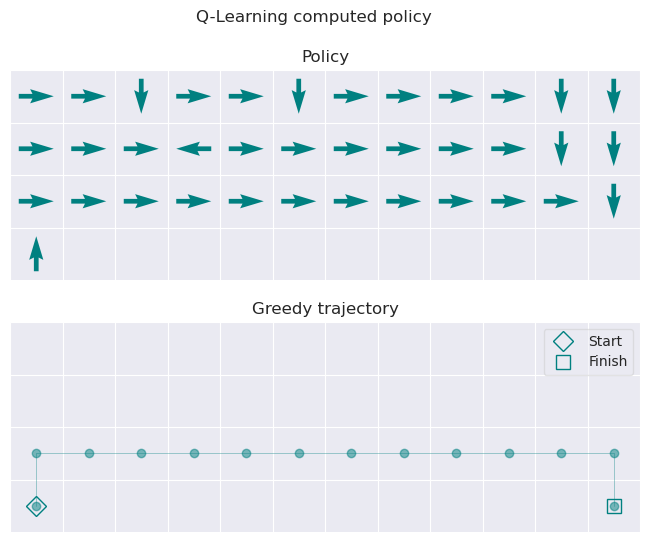

In [26]:
ql.plot_current_policy(color=QL_COLOUR)